In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm
import scipy.stats as ss
from matplotlib.cm import ScalarMappable 

df = pd.read_csv('datisalute1.csv')
df1=pd.read_csv('datisalute2.csv')
df.head()
df1.head()


,ITTER107,Territorio,TIPO_DATO_AVQ,Tipo dato,MISURA_AVQ,Misura,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,ITF,Sud,0_CHRONIC_ALLER,malati cronici - affetti da malattie allergiche,THV,valori in migliaia,2016,2016,1371,NaN,NaN
1,ITE,Centro,0_CHRONIC_OSTEO,malati cronici - affetti da osteoporosi,THV,valori in migliaia,2016,2016,1035,NaN,NaN
2,3,periferia area metropolitana,0_CHRONIC_GASTR,malati cronici - affetti da ulcera gastrica o ...,THV,valori in migliaia,2016,2016,161,NaN,NaN
3,ITCD,Nord,0_ALEAST_1CRON,persone con almeno una malattia cronica,THV,valori in migliaia,2016,2016,11106,NaN,NaN
4,ITG,Isole,0_CHRONIC_OSTEO,malati cronici - affetti da osteoporosi,THV,valori in migliaia,2016,2016,623,NaN,NaN


In [475]:
#remove unnecessary columns from the two datasets 
df= df[['Territorio', 'TIPO_DATO_AVQ','TIME','Value']]
df1= df1[['Territorio', 'TIPO_DATO_AVQ','TIME','Value']]

df1.T.head()
df.T.head()


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
Territorio,Sud,Centro,periferia area metropolitana,Nord,Isole,Centro,centro area metropolitana,Isole,Centro,Nord,...,periferia area metropolitana,periferia area metropolitana,centro area metropolitana,Isole,centro area metropolitana,periferia area metropolitana,periferia area metropolitana,periferia area metropolitana,periferia area metropolitana,periferia area metropolitana
TIPO_DATO_AVQ,0_CHRONIC_ALLER,0_CHRONIC_OSTEO,0_CHRONIC_GASTR,0_ALEAST_1CRON,0_CHRONIC_OSTEO,0_ALEAST_2CRON,0_CHRONIC_OSTEO,0_CHRONIC_GH,0_GOOD_H,0_CHRONIC_GASTR,...,0_CHRONIC_HYP,0_CHRONIC_OSTEO,0_CHRONIC_NERVOUS,0_CHRONIC_GASTR,0_ALEAST_2CRON,0_ALEAST_1CRON,0_CHRONIC_GH,0_ALEAST_2CRON,0_CHRONIC_DIAB,0_CHRONIC_BRONC
TIME,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
Value,1438,987,227,11440,682,2509,737,1092,8631,658,...,1541,620,386,148,1853,3615,1774,1763,528,510


In [476]:

data=pd.get_dummies(df1)
data1=pd.get_dummies(df)
data1.head()



,TIME,Value,Territorio_Centro,Territorio_Isole,Territorio_Mezzogiorno,Territorio_Nord,Territorio_Sud,Territorio_centro area metropolitana,Territorio_periferia area metropolitana,TIPO_DATO_AVQ_0_ALEAST_1CRON,...,TIPO_DATO_AVQ_0_CHRONIC_ARTH,TIPO_DATO_AVQ_0_CHRONIC_BRONC,TIPO_DATO_AVQ_0_CHRONIC_DIAB,TIPO_DATO_AVQ_0_CHRONIC_GASTR,TIPO_DATO_AVQ_0_CHRONIC_GH,TIPO_DATO_AVQ_0_CHRONIC_HEART,TIPO_DATO_AVQ_0_CHRONIC_HYP,TIPO_DATO_AVQ_0_CHRONIC_NERVOUS,TIPO_DATO_AVQ_0_CHRONIC_OSTEO,TIPO_DATO_AVQ_0_GOOD_H
0,2020,1438,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,987,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2020,227,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2020,11440,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2020,682,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [477]:
data2 = pd.concat([data1,data], ignore_index=True)
data2 = data2[['TIME','Value','Territorio_Centro','Territorio_Isole','Territorio_Mezzogiorno','Territorio_Nord','Territorio_Sud','Territorio_centro area metropolitana','Territorio_periferia area metropolitana','TIPO_DATO_AVQ_0_CHRONIC_DIAB','TIPO_DATO_AVQ_0_CHRONIC_HEART']]
data2.head()

,TIME,Value,Territorio_Centro,Territorio_Isole,Territorio_Mezzogiorno,Territorio_Nord,Territorio_Sud,Territorio_centro area metropolitana,Territorio_periferia area metropolitana,TIPO_DATO_AVQ_0_CHRONIC_DIAB,TIPO_DATO_AVQ_0_CHRONIC_HEART
0,2020,1438,0,0,0,0,1,0,0,0,0
1,2020,987,1,0,0,0,0,0,0,0,0
2,2020,227,0,0,0,0,0,0,1,0,0
3,2020,11440,0,0,0,1,0,0,0,0,0
4,2020,682,0,1,0,0,0,0,0,0,0


In [478]:
data2.rename(columns={'Territorio_Centro': 'CENTER',
'Territorio_isole': 'ISLAND',
'Territorio_Mezzogiorno':'CENTER_SOUTH',
'Territorio_Nord':'NORTH',
'Territorio_Sud':'SOUTH',
'Territorio_centro area metropolitana':'CITY_CENTER',
'Territorio_periferia area metropolitana': 'PERIFERY',
'TIPO_DATO_AVQ_0_CHRONIC_DIAB':'DIABETES',
'TIPO_DATO_AVQ_0_CHRONIC_HEART':'HEART_DISEASE',
'TIME':'DATE',
'Value': 'COUNTS_THOUSANDS'}, inplace=True)

In [479]:
data2.set_index(keys='DATE')


,COUNTS_THOUSANDS,CENTER,Territorio_Isole,CENTER_SOUTH,NORTH,SOUTH,CITY_CENTER,PERIFERY,DIABETES,HEART_DISEASE
DATE,,,,,,,,,,
2020,1438,0,0,0,0,1,0,0,0,0
2020,987,1,0,0,0,0,0,0,0,0
2020,227,0,0,0,0,0,0,1,0,0
2020,11440,0,0,0,1,0,0,0,0,0
2020,682,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2016,2994,0,0,0,0,0,0,1,0,0
2016,1451,0,0,0,0,0,0,1,0,0
2016,1446,0,0,0,0,0,0,1,0,0


In [480]:
temp= data2.query('SOUTH==1').query('DIABETES==1')
temp1= data2.query('NORTH==1').query('DIABETES==1')

north, south= temp1[['DATE','COUNTS_THOUSANDS','NORTH','DIABETES']],temp[['DATE','COUNTS_THOUSANDS','SOUTH','DIABETES']]

data4= north
data4=pd.melt(data4, id_vars=['DATE','COUNTS_THOUSANDS','DIABETES'], value_vars=['NORTH'],var_name='REGION', value_name='REGION1', col_level=None)

data4.head()

,DATE,COUNTS_THOUSANDS,DIABETES,REGION,REGION1
0,2020,1477,1,NORTH,1
1,2016,1271,1,NORTH,1


In [481]:
data4= data4[['DATE','COUNTS_THOUSANDS','DIABETES','REGION']]
data4.head()

,DATE,COUNTS_THOUSANDS,DIABETES,REGION
0,2020,1477,1,NORTH
1,2016,1271,1,NORTH


In [482]:
data4.groupby(['REGION','DATE']).agg({'COUNTS_THOUSANDS':'sum'})

COUNTS_THOUSANDS
REGION DATE                  
NORTH  2016              1271
       2020              1477

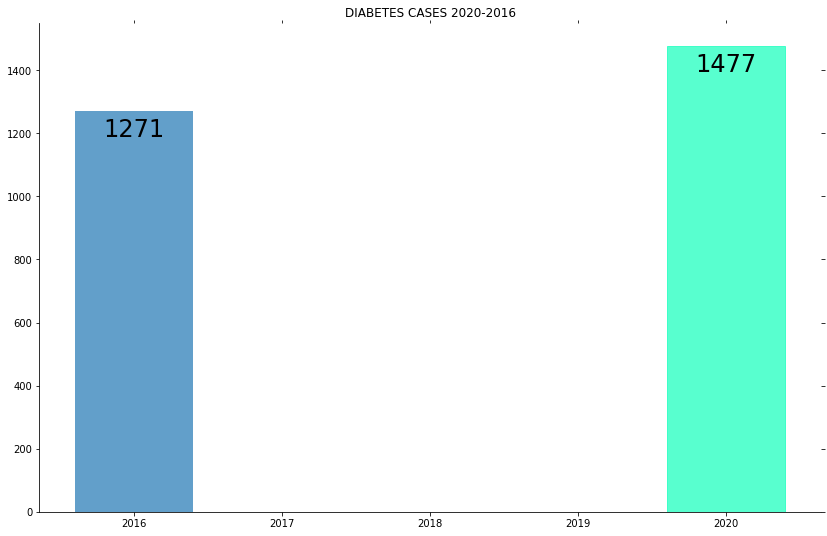

In [531]:
fig= plt.figure(figsize=(14,9))
plt.figure
data4= data4[['COUNTS_THOUSANDS','DATE']]
count = data4['COUNTS_THOUSANDS']
DATE= data4['DATE']
bars= plt.bar(DATE,count, alpha=0.7)
plt.title('DIABETES CASES 2020-2016')
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]

bars[0].set_color('#1FB4')
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 80, str(int(bar.get_height())), 
                 ha='center', color='black', fontsize=24)


plt.show()
